In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_parquet('prediction_input.parquet',engine='pyarrow') 
# test dataset remove before hackaton
print(f'Dataset shape {df.shape}')
df.tail()

Dataset shape (226364, 7)


,Unit_4_Power,Unit_4_Reactive Power,Turbine_Guide Vane Opening,Turbine_Pressure Drafttube,Turbine_Pressure Spiral Casing,Turbine_Rotational Speed,mode
timepoints,,,,,,,
1971-02-03 20:16:19,113.553752,-20.230184,44.871419,100.034072,5419.023758,106.746818,operation
1971-02-03 20:16:20,110.520494,-20.911359,43.954699,100.034548,5419.328873,106.734902,operation
1971-02-03 20:16:21,107.487618,-21.592784,43.037925,100.035024,5419.633988,106.722986,operation
1971-02-03 20:16:22,104.454741,-22.274208,42.121151,100.035287,5420.094237,106.711070,operation
1971-02-03 20:16:23,101.421865,-22.955633,41.204377,100.034405,5421.385963,106.699154,operation


In [6]:
df['mode'] = pd.get_dummies(df['mode'],drop_first=True)


In [16]:
from joblib import dump, load

cols = ['Bolt_1_Tensile', 'Bolt_2_Tensile', 'Bolt_3_Tensile', 'Bolt_4_Tensile',
       'Bolt_5_Tensile','Bolt_6_Tensile']
dff = pd.DataFrame(index=df.index)

for c in cols:
    model = load(f'{c}.joblib')
    preds = model.predict(df)
    dff[c] = preds


In [17]:
dff

,Bolt_1_Tensile,Bolt_2_Tensile,Bolt_3_Tensile,Bolt_4_Tensile,Bolt_5_Tensile,Bolt_6_Tensile
timepoints,,,,,,
1971-01-25 11:06:49,1639.811193,1500.269823,1702.079712,1606.102261,1640.745158,1687.108158
1971-01-25 11:06:50,1639.188249,1500.748443,1701.485960,1606.090665,1640.736166,1687.476074
1971-01-25 11:06:51,1637.489965,1500.748443,1701.485960,1606.039985,1640.750283,1685.745617
1971-01-25 11:06:52,1637.186915,1504.278719,1702.188998,1606.039985,1640.750283,1685.698610
1971-01-25 11:06:53,1636.097127,1505.880247,1702.188998,1605.980365,1640.750283,1685.599200
...,...,...,...,...,...,...
1971-02-03 20:16:19,1523.398585,1426.363329,1679.073205,1573.220611,1607.825670,1677.063569
1971-02-03 20:16:20,1523.398585,1421.064240,1679.073205,1573.220611,1607.825670,1677.063569
1971-02-03 20:16:21,1523.398585,1421.064240,1679.073205,1573.220611,1607.724001,1676.337723


In [18]:
dff.to_csv('preds.csv')

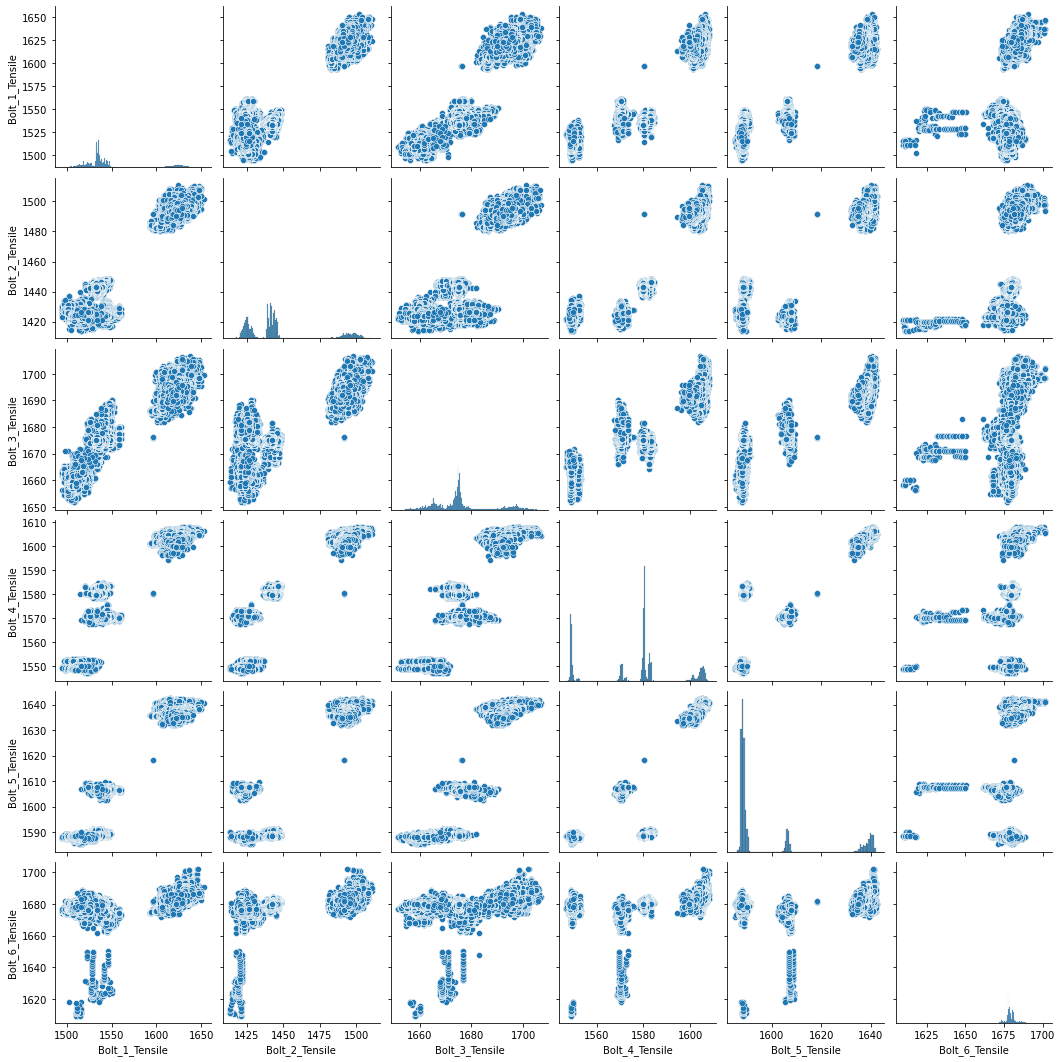

In [20]:
sns.pairplot(dff)

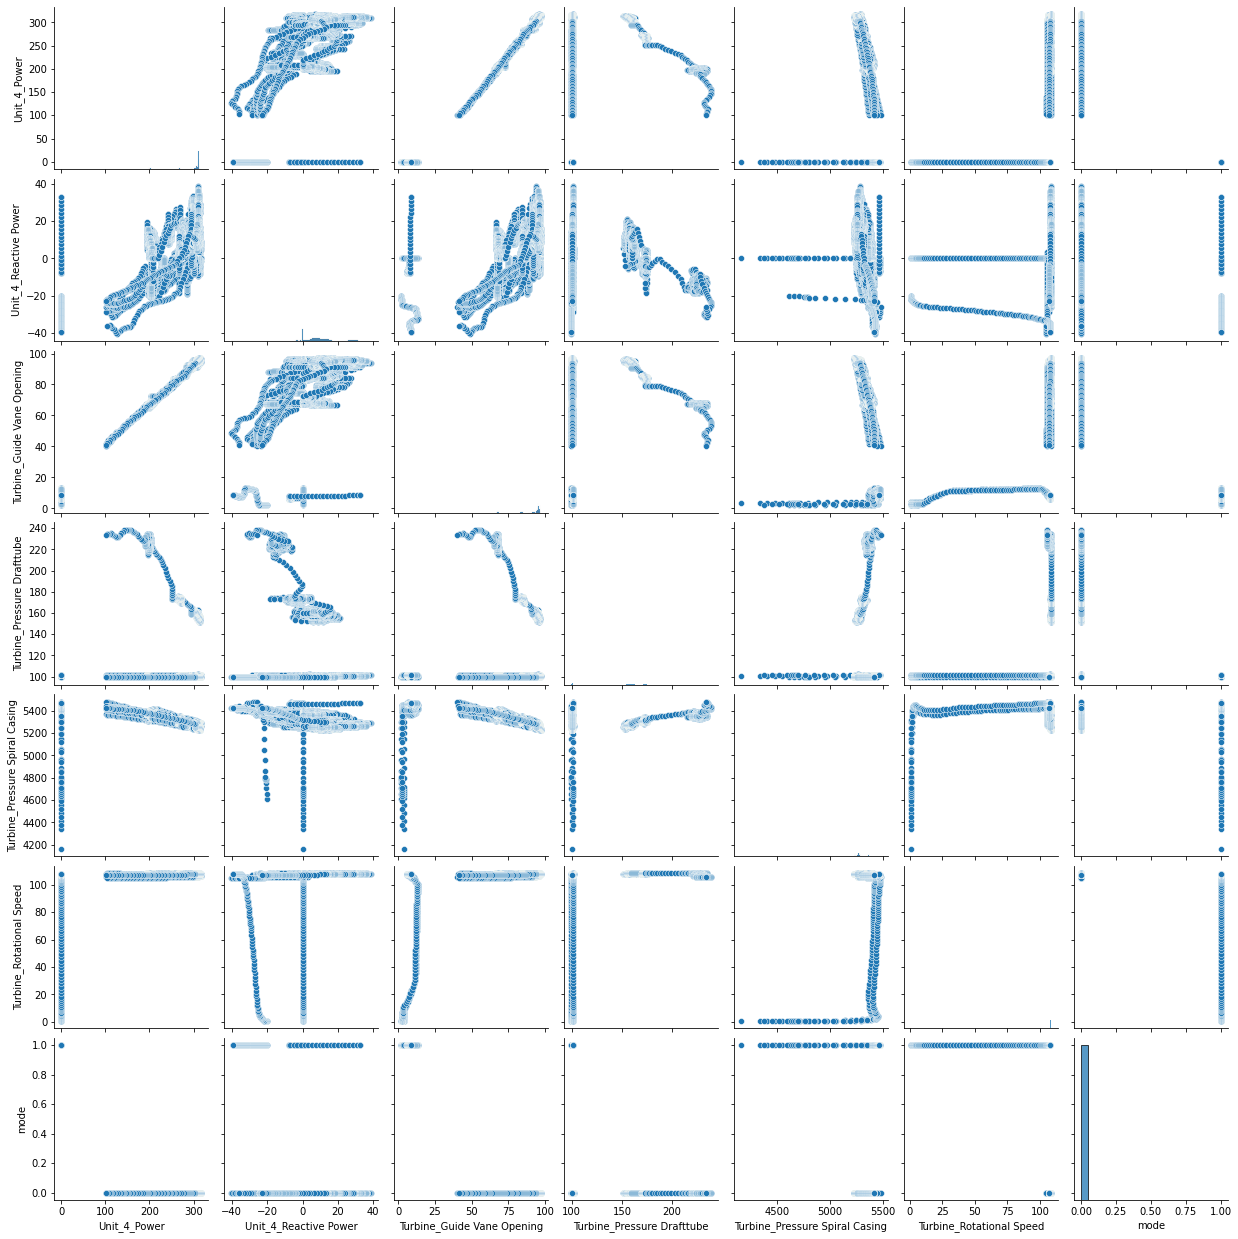

In [21]:
sns.pairplot(df)

In [24]:
df.isna().sum()

Unit_4_Power                      0
Unit_4_Reactive Power             0
Turbine_Guide Vane Opening        0
Turbine_Pressure Drafttube        0
Turbine_Pressure Spiral Casing    0
Turbine_Rotational Speed          0
mode                              0
dtype: int64